In [1]:
from sentence_transformers import SentenceTransformer

/home/balla/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/home/balla/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: h

In [2]:
model = SentenceTransformer('allenai-specter')

In [4]:
import pandas as pd

In [6]:
pone = pd.read_csv('../../Data/Experiment/Plosone/pone_final.csv')

In [7]:
pone

,Unnamed: 0,Year,Title,Abstract,Role,Affiliation index,Affiliation list,Discipline,Filename
0,0,2016,"1,25(OH)2D3 and VDR Signaling Pathways Regulat...",\n\nBackground\nThe objective of this study is...,"[[], [], [], [], [], [], [], []]","[['aff001'], ['aff001', 'cor001'], ['aff001'],...","['1 Department of Ophthalmology, The Affiliate...","['Medicine and health sciences', 'Anatomy', 'B...",/data02/plos/pone/journal.pone.0164717.xml
1,1,2018,"A non-invasive, quantitative study of broadban...","\nCurrently, non-invasive methods for studying...","[['Data curation', 'Formal analysis', 'Investi...","[['aff001', 'cor001'], ['aff001'], ['aff002'],...",['1 Department of Psychology and Center for Ne...,"['Engineering and technology', 'Signal process...",/data02/plos/pone/journal.pone.0193107.xml
2,2,2016,The Effects of Financial Education on Impulsiv...,"\nDelay discounting, as a behavioral measure o...","[[], [], [], []]","[['aff001', 'cor001'], ['aff001'], ['aff002'],...","['1 Department of Psychology, Utah State Unive...","['Social sciences', 'Psychology', 'Personality...",/data02/plos/pone/journal.pone.0159561.xml
3,3,2016,Root-Zone Warming Differently Benefits Mature ...,\nSub-optimal temperature extensively suppress...,"[[], [], [], []]","[['aff001'], ['aff001'], ['aff001'], ['cor001'...",['Beijing Key Laboratory of Growth and Develop...,"['Medicine and health sciences', 'Vascular med...",/data02/plos/pone/journal.pone.0155298.xml
4,4,2017,A hypomorphic PIGA gene mutation causes severe...,\nMutations in genes involved in glycosylphosp...,"[[], [], [], [], [], [], [], [], [], [], []]","[['aff001'], ['aff002'], ['aff001'], ['aff001'...","['1 Division of Hematology, Department of Medi...","['Biology and life sciences', 'Cell biology', ...",/data02/plos/pone/journal.pone.0174074.xml
...,...,...,...,...,...,...,...,...,...
70382,70382,2018,Measurement agreement of the self-administered...,\nBefore organizing mixed-mode data collection...,"[['Formal analysis', 'Investigation', 'Methodo...","[['aff001', 'aff002', 'cor001'], ['aff001'], [...","['1 Department Epidemiology and public health,...","['Medicine and health sciences', 'Mental healt...",/data02/plos/pone/journal.pone.0197434.xml
70383,70383,2019,ST analysis of the fetal electrocardiogram – C...,"\nIn their paper, Andriessen at al present a v...","[['Conceptualization', 'Formal analysis', 'Wri...","[['aff001'], ['aff002'], ['aff003', 'currentaf...","['1 Department of Pediatrics, Institute of Cli...","['Medicine and health sciences', 'Cardiology',...",/data02/plos/pone/journal.pone.0221210.xml
70384,70384,2018,Commentary on “The number of undocumented immi...,\n“The number of undocumented immigrants in th...,"[['Writing – original draft'], ['Methodology',...","[['aff001'], ['aff001'], ['aff002'], ['aff001'...","['1 Migration Policy Institute, Washington, D....","['Social sciences', 'Human geography', 'Housing']",/data02/plos/pone/journal.pone.0204199.xml
70385,70385,2019,Why -aVF can be used in STAN as a proxy for sc...,\nThe conclusion of our recent paper that perf...,"[['Conceptualization', 'Data curation', 'Forma...","[['aff001', 'aff002', 'cor001'], ['aff003', 'a...","['1 Department of Biomedical Engineering, Maas...","['Medicine and health sciences', 'Medical devi...",/data02/plos/pone/journal.pone.0221220.xml


In [8]:
pone['Abstract']= pone['Abstract'].apply(lambda x: " ".join(x.split()))
pone['Title']= pone['Title'].apply(lambda x: " ".join(x.split()))

In [14]:
paper_texts = [pone.loc[i]['Title'] + '[SEP]' + pone.loc[i]['Abstract'] for i in range(len(pone))]

In [15]:
corpus_embeddings = model.encode(paper_texts, convert_to_tensor=True)

In [18]:
len(corpus_embeddings),len(corpus_embeddings[0])

(70387, 768)

In [47]:
pone[pone['Title'].apply(lambda x: True if 'Measuring national capability over big' in x else False)]

,Unnamed: 0,Year,Title,Abstract,Role,Affiliation index,Affiliation list,Discipline,Filename
32682,32682,2019,Measuring national capability over big science...,"In the era of big science, countries allocate ...","[['Formal analysis', 'Writing – original draft...","[['aff001', 'aff002', 'aff003'], ['aff004'], [...",['\n1\nDepartment of Industrial and Management...,"['People and places', 'Geographical locations'...",/data02/plos/pone/journal.pone.0211963.xml


In [22]:
import json
import os
from sentence_transformers import SentenceTransformer, util

In [45]:
def search_papers(index):
    query_embedding = model.encode(pone['Title'][index]+'[SEP]'+pone['Abstract'][index], convert_to_tensor=True)

    search_hits = util.semantic_search(query_embedding, corpus_embeddings)
    search_hits = search_hits[0]  #Get the hits for the first query

    print("Paper:", pone['Title'][index])
    print("Most similar papers:")
    for hit in search_hits:
        related_paper = pone.loc[hit['corpus_id']]
        print("{:.2f}\t{}\t{} {}".format(hit['score'], related_paper['Title'], related_paper['Discipline'], related_paper['Year'])+"\n")
 

In [48]:
search_papers(32682)

Paper: Measuring national capability over big science’s multidisciplinarity: A case study of nuclear fusion research
Most similar papers:
1.00	Measuring national capability over big science’s multidisciplinarity: A case study of nuclear fusion research	['People and places', 'Geographical locations', 'Asia', 'India'] 2019

0.87	How Does National Scientific Funding Support Emerging Interdisciplinary Research: A Comparison Study of Big Data Research in the US and China	['People and places', 'Population groupings', 'Professions', 'Engineers'] 2016

0.87	Does Size Matter? The Multipolar International Landscape of Nanoscience	['Physical sciences', 'Chemistry', 'Chemical biology'] 2016

0.86	Scientific Wealth in Middle East and North Africa: Productivity, Indigeneity, and Specialty in 1981–2013	['Engineering and technology', 'Geological engineering'] 2016

0.85	The Scientific Impact of Developing Nations	['People and places', 'Geographical locations', 'Africa', 'South Africa'] 2016

0.84	Vani

# UMAP

In [49]:
import umap.umap_ as umap

/home/balla/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [51]:
import matplotlib.font_manager as fm

In [52]:
fontprop=fm.FontProperties(fname="/home/balla/yeoncham/data/Helvetica 400.ttf",size=19)

In [53]:
font_name = fontprop

In [64]:
total_embedding = corpus_embeddings.cpu().numpy()

In [139]:
np.save('../../Data/Experiment/Plosone/pone_sBERT.npy',total_embedding)

In [134]:
import matplotlib.pyplot as plt
embedding1 = umap.UMAP(n_neighbors=5,
                        min_dist=0.1, 
                        metric='cosine',random_state=9000).fit_transform(total_embedding)

In [57]:
#Korean - English Institute set
subject_list={'Biology and life sciences','Computer and information sciences','Earth sciences','Ecology and environmental sciences','Engineering and technology','Medicine and health sciences','People and places','Physical sciences','Research and analysis methods','Science policy','Social sciences'}






In [58]:
# index number of each research institute
index_by_subject = {}
for subject in subject_list:
    print(subject)
    index_by_subject[subject] = list(pone[pone['Discipline'].apply(lambda x: True if subject in x else False)].index)


Ecology and environmental sciences
Medicine and health sciences
People and places
Biology and life sciences
Earth sciences
Social sciences
Physical sciences
Engineering and technology
Science policy
Computer and information sciences
Research and analysis methods


In [60]:
import numpy as np

In [62]:
sub_name = ['Earth sciences',
 'Ecology and environmental sciences',
 'Computer and information sciences',
 'Engineering and technology',
 'Physical sciences',
 'Science policy',
 'Medicine and health sciences',
 'Research and analysis methods',
'Biology and life sciences',
 'People and places',
'Social sciences']


In [69]:
len(sub_name)

11

6

[(0.6941176470588235, 0.34901960784313724, 0.1568627450980392, 1.0), (1.0, 1.0, 0.6, 1.0), (0.41568627450980394, 0.23921568627450981, 0.6039215686274509, 1.0), (0.792156862745098, 0.6980392156862745, 0.8392156862745098, 1.0), (1.0, 0.4980392156862745, 0.0, 1.0), (0.9921568627450981, 0.7490196078431373, 0.43529411764705883, 1.0), (0.984313725490196, 0.6039215686274509, 0.6, 1.0), (0.2, 0.6274509803921569, 0.17254901960784313, 1.0), (0.6980392156862745, 0.8745098039215686, 0.5411764705882353, 1.0), (0.12156862745098039, 0.47058823529411764, 0.7058823529411765, 1.0), (0.6509803921568628, 0.807843137254902, 0.8901960784313725, 1.0)]
Earth sciences
Ecology and environmental sciences
Computer and information sciences
Engineering and technology
Physical sciences
Science policy
Medicine and health sciences
Research and analysis methods
Biology and life sciences
People and places
Social sciences


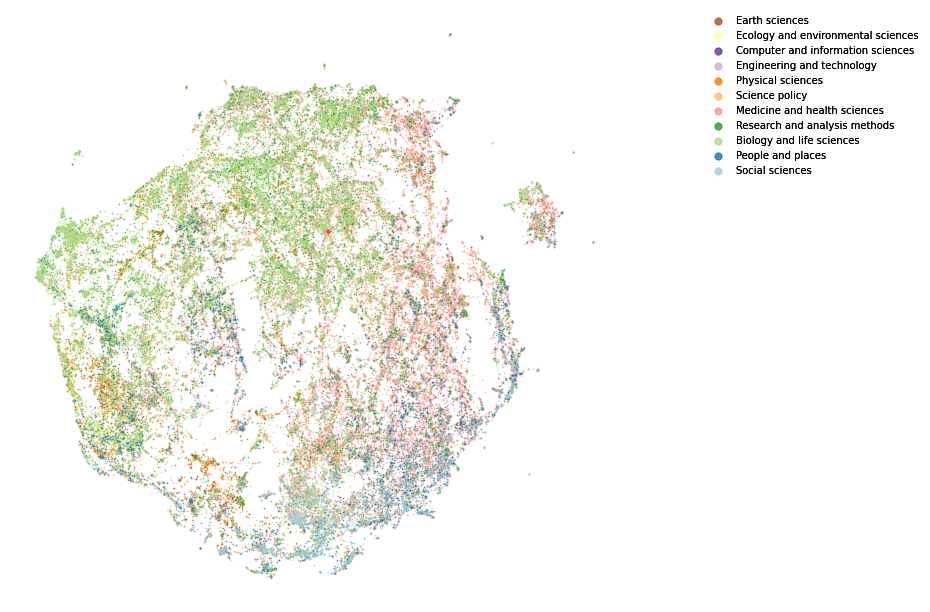

In [137]:

plt.rcParams["figure.figsize"]=(11,11)


c_lst=[plt.cm.Paired(a) for a in np.linspace(1.0, 0, 11)]

# # c_lst[-2] = 'lightblue'
print(c_lst)
# c_lst=[]
# c_lst=c_lst+[plt.cm.Reds(a) for a in np.linspace(1.0, 0.4, 1)]
# c_lst=c_lst+[plt.cm.BrBG(a) for a in np.linspace(0.18, 0.35, 1)]
# # c_lst=c_lst+[plt.cm.PRGn(a) for a in np.linspace(0.4, 0, 5)]
# c_lst=c_lst+[plt.cm.PiYG(a) for a in np.linspace(0.9, 0.75, 2)]
# c_lst=c_lst+[plt.cm.Blues(a) for a in np.linspace(0.9, 0.5,1)]
# # c_lst=c_lst+[plt.cm.BrBG(a) for a in np.linspace(0.2, 0.0, 2)]
# c_lst=c_lst+[plt.cm.Greys(a) for a in np.linspace(1.0, 0.65, 1)]

# c_lst = ['red','purple','green','blue','orange']
for i, subject in enumerate(sub_name):
    print(subject)
    xs = embedding1[index_by_subject[subject]][:,0]
    ys = embedding1[index_by_subject[subject]][:,1]
    if i==0:
        scatters=[plt.scatter(xs, ys, s=0.6,color=c_lst[i],label=subject,alpha=0.6)]
    else:
        scatters = scatters+[plt.scatter(xs, ys, s=0.6,color=c_lst[i],label=subject,alpha=0.6)]

        
xs = embedding1[13][0]
ys = embedding1[13][1]
scatters = scatters+[plt.scatter(xs, ys, s=10,color='red',label=subject,alpha=0.6)]
#=============================================================
# xs = embedding1[index_by_affiliation['통일연구원']][:,0]
# ys = embedding1[index_by_affiliation['통일연구원']][:,1] 
# scatters=[plt.scatter(xs, ys, s=9,color=c_lst[i],label=name,alpha=0.5)]

# xs = embedding1[22+23124][0]
# ys = embedding1[22+23124][1]
# scatters = scatters+[plt.scatter(xs, ys, s=300,color=c_lst[22],label=name,alpha=1)]
#=============================================================

# for i,index in enumerate(range(len(report),len(emb_vector_total))):
#     xs = embedding1[index][0]
#     ys = embedding1[index][1]
#     scatters = scatters+[plt.scatter(xs, ys, s=40,color=c_lst[i],label=name,alpha=1)]
#     if unique_affiliation_classified_government_eng[i] == 'KIET':
#         plt.text(xs - 0.3,ys+0.15, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
#     elif unique_affiliation_classified_government_eng[i] == 'STEPI':
#         plt.text(xs - 0.15,ys-0.3, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
#     elif unique_affiliation_classified_government_eng[i] == 'AURI':
#         plt.text(xs - 0.1,ys-0.3, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
#     elif len(unique_affiliation_classified_government_eng[i]) == 4:
#         plt.text(xs - 0.25,ys-0.3, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
#     elif len(unique_affiliation_classified_government_eng[i]) == 5:
#         plt.text(xs - 0.3,ys-0.35, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
#     elif len(unique_affiliation_classified_government_eng[i]) == 6:
#         plt.text(xs - 0.35,ys-0.35, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')
#     else:
#         plt.text(xs - 0.15,ys-0.3, unique_affiliation_classified_government_eng[i],fontsize=15,color='black')

#     if unique_affiliation_classified_government_eng[i] == 'KRIHS':
#         plt.text(xs - 0.3,ys+0.1, unique_affiliation_classified_government_eng[i],fontsize=12,color='black')
#     elif unique_affiliation_classified_government_eng[i] == 'KDIschool':
#         plt.text(xs - 0.5,ys-0.25, unique_affiliation_classified_government_eng[i],fontsize=12,color='black')
#     else:
#         plt.text(xs - 0.2,ys-0.3, unique_affiliation_classified_government_eng[i],fontsize=12,color='black')


# print()



# fs=17
# # plt.text(1.3, 4.5,"Shipping", fontsize=fs,fontproperties=fontprop,color=c_lst[7])
# # plt.text(-5,-4.5,"Nursery",fontsize=fs,fontproperties=fontprop,color=c_lst[22])
# plt.text(-0,5.1,"North Korea/\nUnification",fontsize=fs,fontproperties=fontprop,color=c_lst[22],fontweight='bold')
# plt.text(2.2,3.3,"Diplomacy/\nForeign",fontsize=fs,fontproperties=fontprop,color=c_lst[0],alpha=0.6)
# # plt.text(-5.2,0.7,"  Industry/\n Enterprise",fontsize=fs,fontproperties=fontprop,color=c_lst[13])
# plt.text(4,-1.5,"Environment",fontsize=fs,fontproperties=fontprop,color=c_lst[10])
# #plt.text(4.9,"Transportation", fontsize=fs,fontproperties=fontprop,color=c_lst[5])
# plt.text(1,-3.4,"     Land\nDevelopment",fontsize=fs,fontproperties=fontprop,color=c_lst[7])
# plt.text(-5.1,0,"Employment\n & Labor",fontsize=fs,fontproperties=fontprop,color=c_lst[21])


# plt.text(3.7,1.8,"Agro-Fishery \nProducts",fontsize=fs,fontproperties=fontprop,color=c_lst[8])
# plt.text(-5.1,3.3,"Education",fontsize=fs,fontproperties=fontprop,color=c_lst[20])
# plt.text(-3,4.4,"Parenting",fontsize=fs,fontproperties=fontprop,color=c_lst[15])
# plt.text(-3,-3,"Crime",fontsize=fs,fontproperties=fontprop,color=c_lst[24])
# plt.xlim(-5.5, 6.7)


# font_name =fm.FontProperties(fname="/home/balla/yeoncham/data/Helvetica 400.ttf",size=14)
legend1 = plt.legend(handles=scatters[0:11],labels=sub_name,bbox_to_anchor=(1.5,1.),frameon=False,loc='upper right')        
plt.gca().add_artist(legend1)
# legend2 = plt.legend(handles=scatters[5:12],labels=unique_affiliation_classified_government_eng[5:12],bbox_to_anchor=(1.1675, 0.821),frameon=False,prop=font_name,loc='upper right')
# plt.gca().add_artist(legend2)
# legend3 = plt.legend(handles=scatters[12:17],labels=unique_affiliation_classified_government_eng[12:17], bbox_to_anchor=(1.1828, 0.575),frameon=False,prop=font_name,loc='upper right')
# plt.gca().add_artist(legend3)
# legend4 = plt.legend(handles=scatters[17:22],labels=unique_affiliation_classified_government_eng[17:22], bbox_to_anchor=(1.1825,0.4),frameon=False,prop=font_name,loc='upper right')
# plt.gca().add_artist(legend4)
# legend5 = plt.legend(handles=scatters[22:27],labels=unique_affiliation_classified_government_eng[22:27], bbox_to_anchor=(1.155,0.225),frameon=False,prop=font_name,loc='upper right',fontsize=2)

# # legend6 = plt.legend(handles=scatters[19:25],labels=unique_affiliation_classified_eng_abb[19:25], bbox_to_anchor=(1.441,0.29),frameon=False,prop=font_name,loc='upper right')
# # plt.gca().add_artist(legend6)
# # legend7 = plt.legend(handles=scatters[25:27],labels=unique_affiliation_classified_eng_abb[25:27], bbox_to_anchor=(1.398,0.0),frameon=False,prop=font_name,loc='upper right')
# plt.axhline(y = 5, xmin = 5, xmax = 6,color = 'r', linestyle = '-')

for point in legend1.legendHandles:
    point._sizes = [50]   
# for point in legend2.legendHandles:
#     point._sizes = [50]
# for point in legend3.legendHandles:
#     point._sizes = [50]
# for point in legend4.legendHandles:
#     point._sizes = [50]
# for point in legend5.legendHandles:
#     point._sizes = [50]
# for point in legend6.legendHandles:
#     point._sizes = [50]
# for point in legend7.legendHandles:
#     point._sizes = [50]


# fg = plt.figure(1);
# ax = fg.add_subplot(1,1,1)
# ax.annotate('', xy=(1.1,0.95), xycoords='axes fraction', xytext=(1.8,0.95), 
#             arrowprops=dict(arrowstyle="-", color='black'))
# ax.annotate('', xy=(1.1,0.6255), xycoords='axes fraction', xytext=(1.8,0.6255), 
#             arrowprops=dict(arrowstyle="-", color='black'))
# ax.annotate('', xy=(1.1,0.38), xycoords='axes fraction', xytext=(1.8,0.38), 
#             arrowprops=dict(arrowstyle="-", color='black'))
# ax.annotate('', xy=(1.1,0.15), xycoords='axes fraction', xytext=(1.8,0.15), 
#             arrowprops=dict(arrowstyle="-", color='black'))

# ax.annotate('Economy',
#             xy=(1.6, 0.9), xytext=(2., 0.9),
#             xycoords=('axes fraction', 'figure fraction'),
#             textcoords='offset points',
#             size=30, ha='center', va='bottom')

# ax.annotate('Land use',
#             xy=(0.5, 0), xytext=(0, 10),
#             xycoords=('axes fraction', 'figure fraction'),
#             textcoords='offset points',
#             size=14, ha='center', va='bottom')

# ax.annotate('Welfare·Labor·Women',
#             xy=(0.5, 0), xytext=(0, 10),
#             xycoords=('axes fraction', 'figure fraction'),
#             textcoords='offset points',
#             size=14, ha='center', va='bottom')
# ax.annotate('',
#             xy=(0.5, 0), xytext=(0, 10),
#             xycoords=('axes fraction', 'figure fraction'),
#             textcoords='offset points',
#             size=14, ha='center', va='bottom')
# ax.annotate('Public Policy',
#             xy=(0.5, 0), xytext=(0, 10),
#             xycoords=('axes fraction', 'figure fraction'),
#             textcoords='offset points',
# #             size=14, ha='center', va='bottom')
plt.xticks([]),plt.yticks([])
plt.axis('off')
#plt.savefig('../../Data/Experiment/~1920/RESULT/UMAP.pdf', bbox_inches='tight')
plt.show()

In [83]:
import ast

In [84]:
pone['Discipline'] = pone['Discipline'].apply(lambda x: ast.literal_eval(x))

In [110]:
pone['Total'] = pone['Abstract'] +pone['Title']

In [132]:
disc_list=[]
for i in index_by_subject['Social sciences']:
    if (embedding1[i][0]>14)&(embedding1[i][0]>6)&('HIV' in pone['Total'][i]):
        print(pone['Title'][i]+'\n')
        print(pone['Discipline'][i])
        disc_list.append(i)
        print("=====================================================")

Capturing sexual contact patterns in modelling the spread of sexually transmitted infections: Evidence using Natsal-3

['Social sciences', 'Psychology', 'Sexual identity']
Does a history of sexual and physical childhood abuse contribute to HIV infection risk in adulthood? A study among post-natal women in Harare, Zimbabwe

['Social sciences', 'Law and legal sciences', 'Criminal justice system', 'Criminal punishment']
Are circumcised men safer sex partners? Findings from the HAALSI cohort in rural South Africa

['Social sciences', 'Sociology', 'Religion']
Structural and Behavioral Correlates of HIV Infection among Pregnant Women in a Country with a Highly Generalized HIV Epidemic: A Cross-Sectional Study with a Probability Sample of Antenatal Care Facilities in Swaziland

['Social sciences', 'Sociology', 'Education', 'Educational attainment']
Drivers of Vaginal Drug Delivery System Acceptability from Internet-Based Conjoint Analysis

['Social sciences', 'Psychology', 'Attitudes (psychol

In [130]:
len(disc_list)

144

In [133]:
len(disc_list)

73

In [86]:
import matplotlib.pyplot as plt

In [87]:
disc_list

['Anatomy',
 'Medical humanities',
 "Women's health",
 'Health care',
 'Epidemiology',
 'Public and occupational health',
 "Women's health",
 'Public and occupational health',
 'Gastroenterology and hepatology',
 'Gastroenterology and hepatology',
 'Pharmaceutics',
 'Mental health and psychiatry',
 'Health care',
 'Surgical and invasive medical procedures',
 'Public and occupational health',
 'Pharmacology',
 'Anatomy',
 'Infectious diseases',
 'Health care',
 'Radiology and imaging',
 'Pharmaceutics',
 'Public and occupational health',
 'Pharmacology',
 'Pathology and laboratory medicine',
 'Physiology',
 'Public and occupational health',
 'Public and occupational health',
 'Ophthalmology',
 'Metabolic disorders',
 'Physiology',
 'Pathology and laboratory medicine',
 'Health care',
 'Mental health and psychiatry',
 'Health care',
 'Oncology',
 'Surgical and invasive medical procedures',
 'Hematology',
 'Public and occupational health',
 'Anatomy',
 'Epidemiology',
 'Health care',
 'Me

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

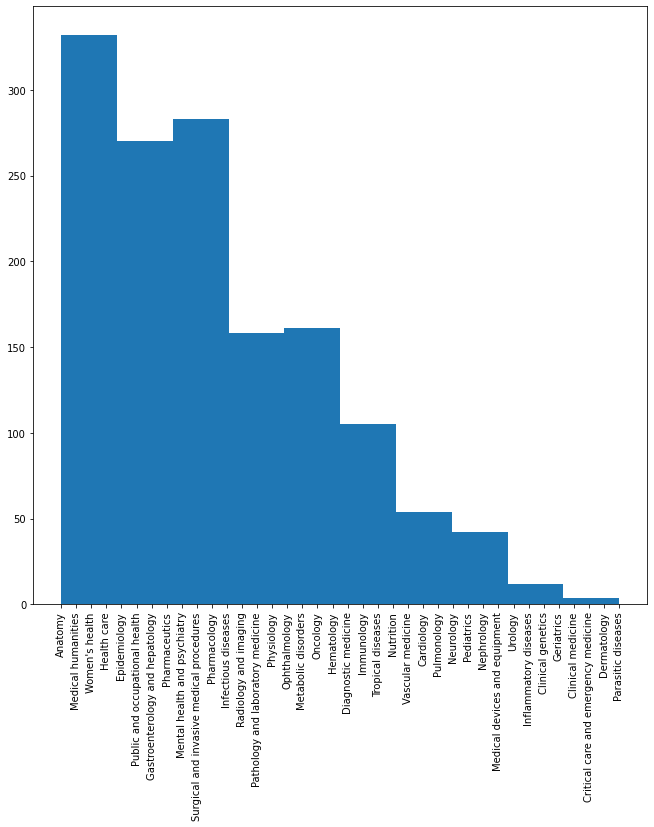

In [93]:
plt.hist(disc_list)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

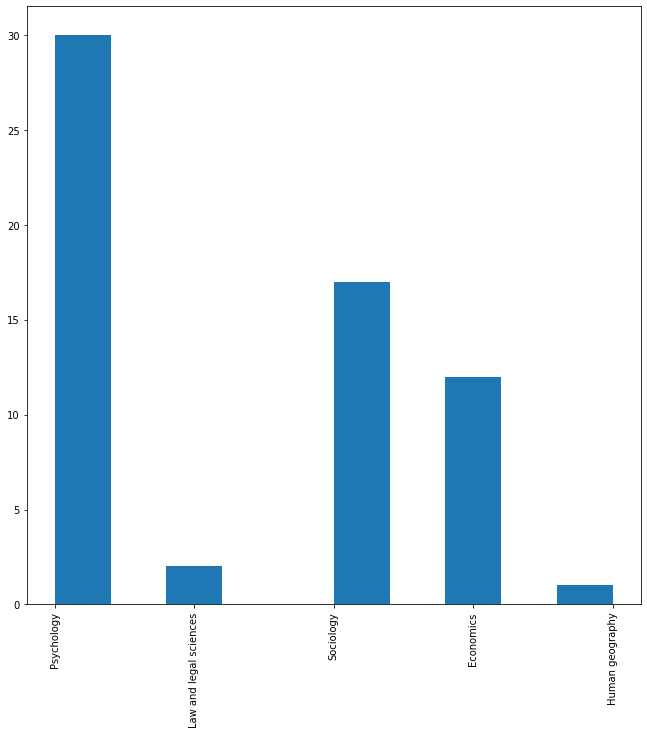

In [91]:
plt.hist(disc_list)



plt.xticks(rotation=90)